In [1]:
# torch library and sublibraries
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

# plotting libraries
import matplotlib
import matplotlib.pyplot as plt 
# numpy (math) libary
import numpy as np

In [2]:
def show_graph(string):
    fig = plt.figure(figsize=(3*6.4, 2*4.8)) # default = 6.4, 4.8
    ax1 = fig.add_subplot(111)

    if string=='loglog':
        for ii, ee in err.items():
            ax1.loglog(ee[2][:], label='error %s, lr=%1.0e'%(ee[0],ee[1]))
    elif string=='logy':
        for ii, ee in err.items():
            ax1.semilogy(ee[2][:], label='error %s, lr=%1.0e'%(ee[0],ee[1]))
    elif string=='logx':
        for ii, ee in err.items():
            ax1.semilogy(ee[2][:], label='error %s, lr=%1.0e'%(ee[0],ee[1]))
    else:
        for ii, ee in err.items():
            ax1.plot(ee[2][:], label='error %s, lr=%1.0e'%(ee[0],ee[1]))

    ax1.set_xlabel('iteration number', fontsize = 16)
    ax1.set_ylabel('loss', fontsize = 16)
    title_string = '%d loops, batch size %d; [%d, %d, %d] are input, hidden, and output dimensions'%(loops,N,D_in,H,D_out)
    ax1.set_title(title_string, fontsize = 16)
    legend = ax1.legend(loc='best', fontsize=16)

    plt.show()
    plt.close()

show_type = 'logy' # prints errors in semi-log axis

In [3]:
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 8, 128, 8
loops = int(256*N)

# from example // rewrites my settings
N, D_in, H, D_out = 2*64, 1000, 100, 10
loops = int(5e3)

In [4]:
# Create random Tensors to hold inputs and outputs, and wrap them in Variables
x = Variable(torch.rand(N, D_in))
y = Variable(torch.rand(N, D_out), requires_grad=False)

In [26]:
# model settings
base_lr = 1e-4
sigm_lr = 5e-4
best_lr = 1e-4

# (re-)initialize data dictionary
#mdl = [] # as in model
err = {} # as in error

In [27]:
# define baseline network with relu (clamp)
class Baseline(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        super(Baseline, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, H)
        self.linearOut = torch.nn.Linear(H, D_out)

    def forward(self, x):
        """
        In the forward function we accept a Variable of input data and we must return
        a Variable of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Variables.
        """
        # sum (linear1) and then relu (clamp)
        h1     = self.linear1(x).clamp(min=0)
        # sum (linear2) and then relu (clamp)
        h2     = self.linear2(h1).clamp(min=0)
        # sum (out) and the output
        y_pred = self.linearOut(h2)
        return y_pred # output = y_pred(icted)

# Construct our model by instantiating the class defined above
basemodel = Baseline(D_in, H, D_out)

# initialize dictionary item
err[0] = ('relu',base_lr,[])

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
criterion = torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.SGD(basemodel.parameters(), lr=err[0][1])

for t in range(loops):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = basemodel(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    err[0][2].append(loss.data[0])
    if (t+1)%(loops//20) == 0:
        print(t+1, loss.data[0])

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
del criterion, optimizer

250 70.51847076416016
500 34.69700622558594
750 14.545985221862793
1000 3.1560935974121094
1250 1.4902126789093018
1500 0.6883432865142822
1750 0.4242554008960724
2000 0.1617085039615631
2250 0.1098996102809906
2500 0.025509897619485855
2750 0.020042067393660545
3000 0.005739392712712288
3250 0.0024712691083550453
3500 0.002912011230364442
3750 0.010450254194438457
4000 0.005921113770455122
4250 0.0013446016237139702
4500 0.0004861286433879286
4750 0.0002684029459487647
5000 0.00018878086120821536


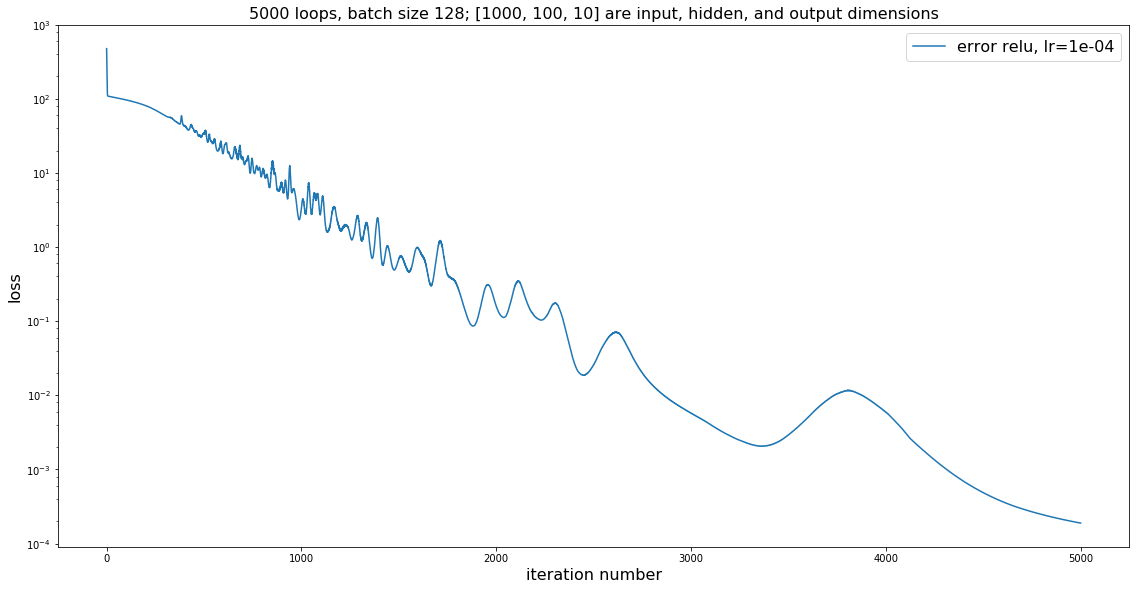

In [28]:
show_graph(show_type)

In [29]:
# define different network with sigmoid
class BaseSigmoid(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        super(BaseSigmoid, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, H)
        self.linearOut = torch.nn.Linear(H, D_out)

    def forward(self, x):
        """
        In the forward function we accept a Variable of input data and we must return
        a Variable of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Variables.
        """
        # sum (linear1) and then sigmoid (F.sigmoid)
        h1     = F.sigmoid(self.linear1(x))
        # sum (linear2) and then sigmoid (F.sigmoid)
        h2     = F.sigmoid(self.linear2(h1))
        # sum (out) and the output
        y_pred = self.linearOut(h2)
        return y_pred # output = y_pred(icted)

# Construct our model by instantiating the class defined above
sigmodel = BaseSigmoid(D_in, H, D_out)

# initialize dictionary item
err[1] = ('sigmoid',sigm_lr,[])

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
criterion = torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.SGD(sigmodel.parameters(), lr=err[1][1])

for t in range(loops):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = sigmodel(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    err[1][2].append(loss.data[0])
    if (t+1)%(loops//20) == 0:
        print(t+1, loss.data[0])

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
del criterion, optimizer

250 107.64708709716797
500 107.50154113769531
750 107.30264282226562
1000 107.00965118408203
1250 106.56072998046875
1500 105.8301773071289
1750 104.56901550292969
2000 102.39214324951172
2250 99.37423706054688
2500 96.98335266113281
2750 95.79724884033203
3000 95.02025604248047
3250 94.15187072753906
3500 92.62508392333984
3750 88.68158721923828
4000 85.0674057006836
4250 77.92921447753906
4500 67.91827392578125
4750 60.4116096496582
5000 48.707149505615234


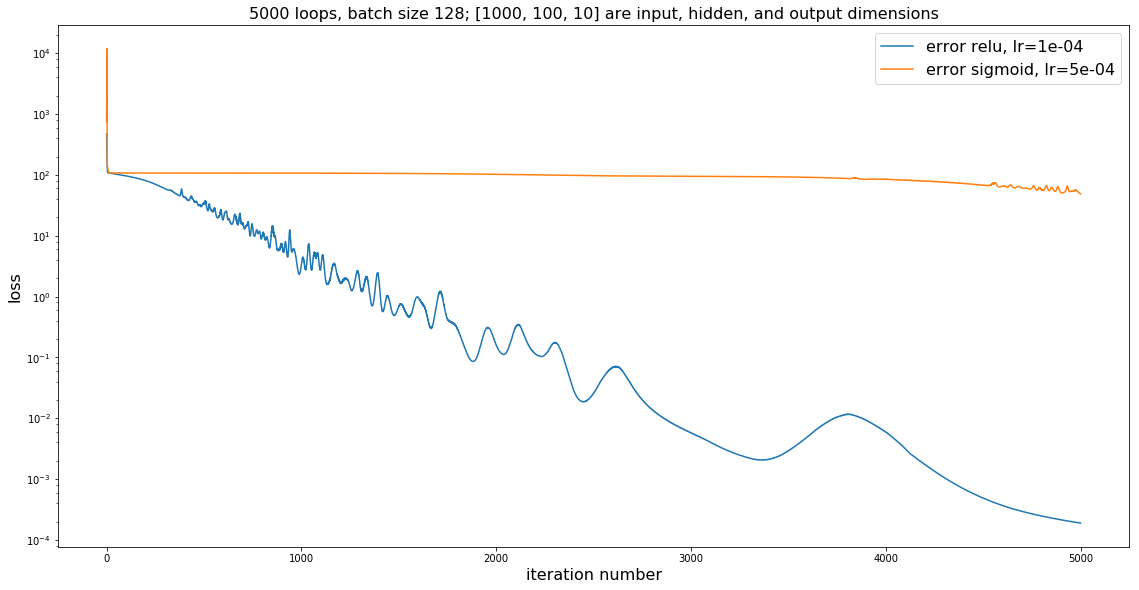

In [30]:
show_graph(show_type)

In [31]:
class BestSigmoid(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        super(BestSigmoid, self).__init__()
        self.linear1   = torch.nn.Linear(D_in, H)
        self.linear2   = torch.nn.Linear(H, H)
        self.linearOut = torch.nn.Linear(H, D_out)

    def forward(self, x):
        """
        In the forward function we accept a Variable of input data and we must return
        a Variable of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Variables.
        """
        # parameters
        p = [ 689.651615, 0.433819208, 1.31042204, -0.975437185, -0.518489780, 0.403015568, 0.502495627]
        
        #p[0], p[1], p[2], p[3], p[4], p[5], p[6]
        #  a,    b,    c,    d,    g,   x0,   x1)
        #b*sigmoid(a*(arg-x0))+c*relu(arg)+d*relu(arg-x0)+g*relu(arg-x1)
        
        h1 = torch.mul( torch.sigmoid( self.linear1(x).add_(-p[5]).mul_(p[0]) ), p[1] )
        h1.add_( self.linear1(x).clamp(min=0).mul_(p[2]) )
        h1.add_( self.linear1(x).clamp(min=p[5]).mul_(p[3]) )
        h1.add_( self.linear1(x).clamp(min=p[6]).mul_(p[4]) )
        
        h2 = torch.mul( torch.sigmoid( self.linear2(h1).add_(-p[5]).mul_(p[0]) ), p[1] )
        h2.add_( self.linear2(h1).clamp(min=0).mul_(p[2]) )
        h2.add_( self.linear2(h1).clamp(min=p[5]).mul_(p[3]) )
        h2.add_( self.linear2(h1).clamp(min=p[6]).mul_(p[4]) )
        
        # sum (out) and the output
        y_pred = self.linearOut(h2)
                                
        return y_pred # output = y_pred(icted)

# Construct our model by instantiating the class defined above
bestmodel = BestSigmoid(D_in, H, D_out)

# initialize dictionary item
err[2] = ('bestfit',best_lr,[])

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
criterion = torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.SGD(bestmodel.parameters(), lr=err[2][1])

for t in range(loops):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = bestmodel(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    err[2][2].append(loss.data[0])
    if (t+1)%(loops//20) == 0:
        print(t+1, loss.data[0])

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
del criterion, optimizer

250 105.90608215332031
500 102.57797241210938
750 104.3633041381836
1000 98.65094757080078
1250 93.19676208496094
1500 87.64791870117188
1750 73.03056335449219
2000 194.00543212890625
2250 75.78931427001953
2500 63.57843017578125
2750 45.45167541503906
3000 41.19403839111328
3250 46.94815444946289
3500 37.524566650390625
3750 24.13939666748047
4000 19.82407569885254
4250 13.719615936279297
4500 26.321870803833008
4750 39.016197204589844
5000 21.978004455566406


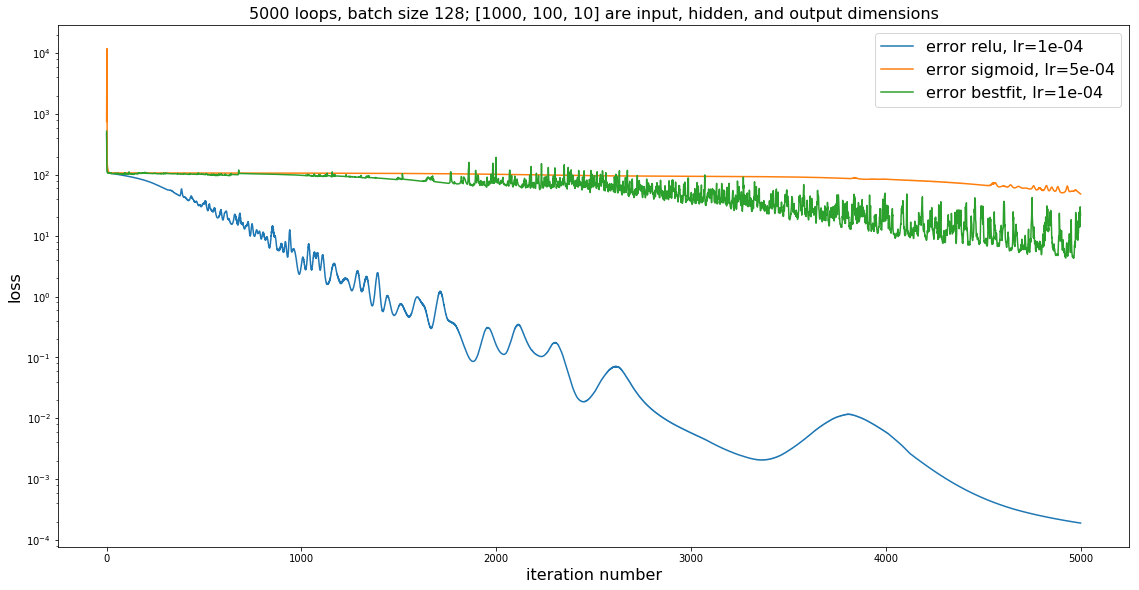

In [32]:
show_graph(show_type)

In [33]:
class MyBestFit(torch.autograd.Function):
    """
    We can implement our own custom autograd Functions by subclassing
    torch.autograd.Function and implementing the forward and backward passes
    which operate on Tensors.
    """   
    p = [ 689.651615, 0.433819208, 1.31042204, -0.975437185, -0.518489780, 0.403015568, 0.502495627]

    def forward(self, input):
        """
        In the forward pass we receive a Tensor containing the input and return a
        Tensor containing the output. You can cache arbitrary Tensors for use in the
        backward pass using the save_for_backward method.
        """
        self.save_for_backward(input)
        
        sig = torch.sigmoid( input.add_(-p[5]).mul_(p[0]) )
        self.save_for_backward( sig )
        
        y = torch.mul( sig, p[1] )
        y.add_( input.clamp(min=0).mul_(p[2]) )
        y.add_( input.clamp(min=p[5]).mul_(p[3]) )
        y.add_( input.clamp(min=p[6]).mul_(p[4]) )
        
        return y

    def backward(self, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        input, sig = self.saved_tensors
        
        grad_relu  = grad_output.clone()
        
        grad_input = torch.mul(grad_output, torch.exp( -input).mul_(p[0]*p[1]) )
        
        grad_input.mul_( torch.mul(sig, sig) )
        
        grad_input.add_( grad_relu[input > 0].mul_(p[2]) )
        grad_input.add_( grad_relu[input > p[5]].mul_(p[3]) )
        grad_input.add_( grad_relu[input > p[6]].mul_(p[4]) )
        
        return grad_input

In [34]:
class MyBestSigmoid(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        super(MyBestSigmoid, self).__init__()
        self.linear1   = torch.nn.Linear(D_in, H)
        self.linear2   = torch.nn.Linear(H, H)
        self.linearOut = torch.nn.Linear(H, D_out)

    def forward(self, x):
        """
        In the forward function we accept a Variable of input data and we must return
        a Variable of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Variables.
        """
                        
        h1 = MyBestFit( self.linear1(x) )
        
        h2 = MyBestFit( self.linear2(h1) )
        
        # sum (out) and the output
        y_pred = self.linearOut(h1)
                                
        return y_pred # output = y_pred(icted)

# Construct our model by instantiating the class defined above
mybestmodel = MyBestSigmoid(D_in, H, D_out)

# initialize dictionary item
err[3] = ('myBestFit',best_lr,[])

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
criterion = torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.SGD(mybestmodel.parameters(), lr=err[3][1])

for t in range(loops):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = mybestmodel(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    err[2][2].append(loss.data[0])
    if (t+1)%(loops//20) == 0:
        print(t+1, loss.data[0])

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
del criterion, optimizer

AttributeError: 'MyBestFit' object has no attribute 'dim'